# Example for the usage of the PoreAnalysis class

## 1. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from AnalysisForNanoporousCarbonMaterials.MembraneStructures import (
    HexagonalMembrane,
)
from AnalysisForNanoporousCarbonMaterials.PoreAnalysis import PoreAnalysis

## 2. Define class object and folder paths

In [2]:
membrane = HexagonalMembrane(L=180, selectors="resname C")

PA = PoreAnalysis(
    topology_file="/bigpool/users/st166545/AnalysisForNanoporousCarbonMaterials/tests/data/hex_box_hex_dod/topol.tpr",
    trajectory_file="/bigpool/users/st166545/AnalysisForNanoporousCarbonMaterials/tests/data/hex_box_hex_dod/traj.xtc",
    membrane=membrane,
    analysis_max_step_size_ps=10000, # skip a lot of frames to make it faster for demonstration purposes
    verbose=True,
)

Results will not be saved because no results folder has been specified.


## 3. Find and verify the membrane location

Allocating trajectories for selectors: "resname C".


	Progress: 100%
Trajectories allocated.
Lower boundary of the hexagonal structure: 233.23501586914062 Angstrom


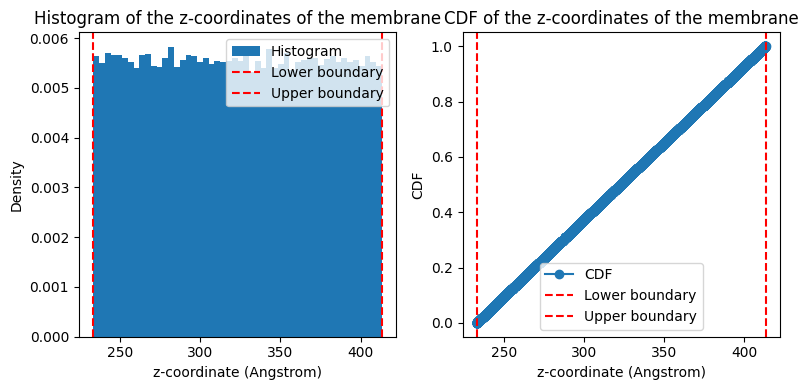

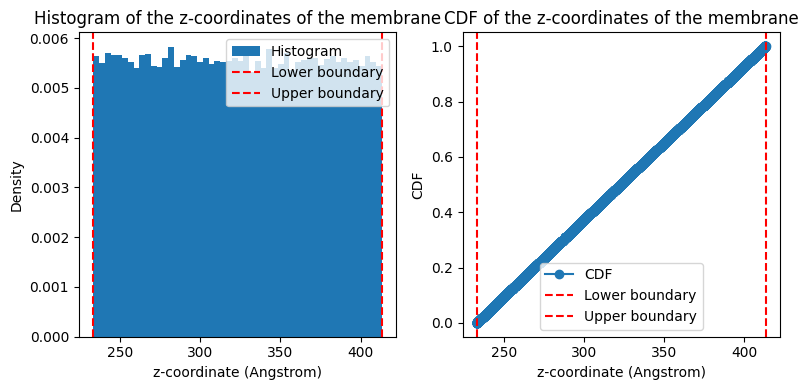

In [3]:
PA.find_membrane_location()
PA.print_membrane_location()
PA.verify_membrane_location()
#233.23501586914062

## 4. Analyse the density of a single molecule

(np.float64(251.23501586914062), np.float64(395.2350158691406))
Allocating trajectories for selectors: "resname DOD and name C3".
	Progress: 21%

	Progress: 100%
Trajectories allocated.


(array([[1.22987069e-16, 2.30165417e-14, 1.54702711e-12, 4.61283900e-11,
         1.16484011e-09, 2.04928421e-08, 1.51651617e-07, 7.03881905e-07,
         5.78833242e-06, 3.80370248e-05, 1.12917361e-04, 1.44968042e-04,
         1.29962945e-04, 1.71714164e-04, 2.07373972e-04, 2.04068465e-04,
         2.24693276e-04, 1.76149322e-04, 1.06065818e-04, 7.70429473e-05,
         4.12090842e-05, 1.15276495e-05, 1.58660351e-06, 1.37681804e-07,
         1.14935966e-08, 6.91300931e-10, 3.06729150e-11, 1.32257502e-12,
         2.85599940e-14, 2.12370028e-16],
        [3.00823585e-14, 3.64890858e-12, 2.10912743e-10, 4.70725353e-09,
         6.16547918e-08, 7.38419320e-07, 4.82891348e-06, 1.48036694e-05,
         4.49756101e-05, 1.69467085e-04, 3.81755929e-04, 4.68161770e-04,
         5.16403819e-04, 6.90877357e-04, 7.75220053e-04, 7.38814236e-04,
         7.49527137e-04, 6.14368920e-04, 4.10159431e-04, 3.16695603e-04,
         2.11076375e-04, 8.28431645e-05, 1.85151970e-05, 3.13540221e-06,
         

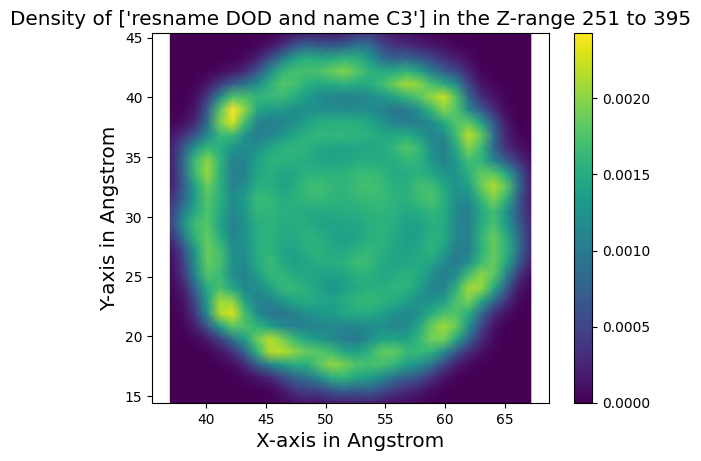

In [4]:
print(PA.membrane.find_zConstraints())
PA.analyseDensity(
    selectors=["resname DOD and name C3"],
    z_range=PA.membrane.find_zConstraints(),
    skip= 1,
    bw=0.13
    )

## 5. Analyse the normed density of several molecules

(np.float64(251.23501586914062), np.float64(395.2350158691406))
Allocating trajectories for selectors: "resname DOD and name C1".
	Progress: 100%
Trajectories allocated.


(array([[2.89295756e-01, 3.62540226e-01, 4.24777467e-01, ...,
         5.10680470e-32, 6.65157428e-34, 7.59310326e-36],
        [3.20540153e-01, 4.19695247e-01, 5.10208114e-01, ...,
         8.78090146e-31, 1.23890053e-32, 1.53200460e-34],
        [3.16553941e-01, 4.34648757e-01, 5.50425279e-01, ...,
         1.28892206e-29, 1.96870168e-31, 2.63556607e-33],
        ...,
        [1.61254838e-33, 1.19546255e-31, 7.76733632e-30, ...,
         2.84118648e-01, 2.24516662e-01, 1.62982252e-01],
        [9.27626668e-35, 7.46262293e-33, 5.26133541e-31, ...,
         2.65183149e-01, 2.19609808e-01, 1.68078351e-01],
        [4.68241248e-36, 4.08652648e-34, 3.12530517e-32, ...,
         2.20207208e-01, 1.90494046e-01, 1.53298763e-01]], shape=(59, 103)),
 <Figure size 640x480 with 2 Axes>)

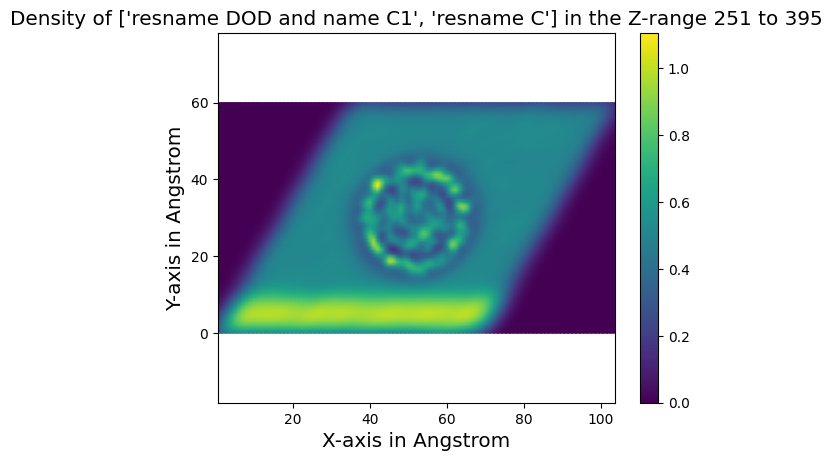

In [5]:
print(PA.membrane.find_zConstraints())
PA.analyseDensityNormed(
    selectors=["resname DOD and name C1", "resname C"],
    z_range=PA.membrane.find_zConstraints(),
    skip= 50,
    bw=0.13
    )

## 6. Determine the effective pore diameter

### 6.1 Find suitable y constraints using histograms

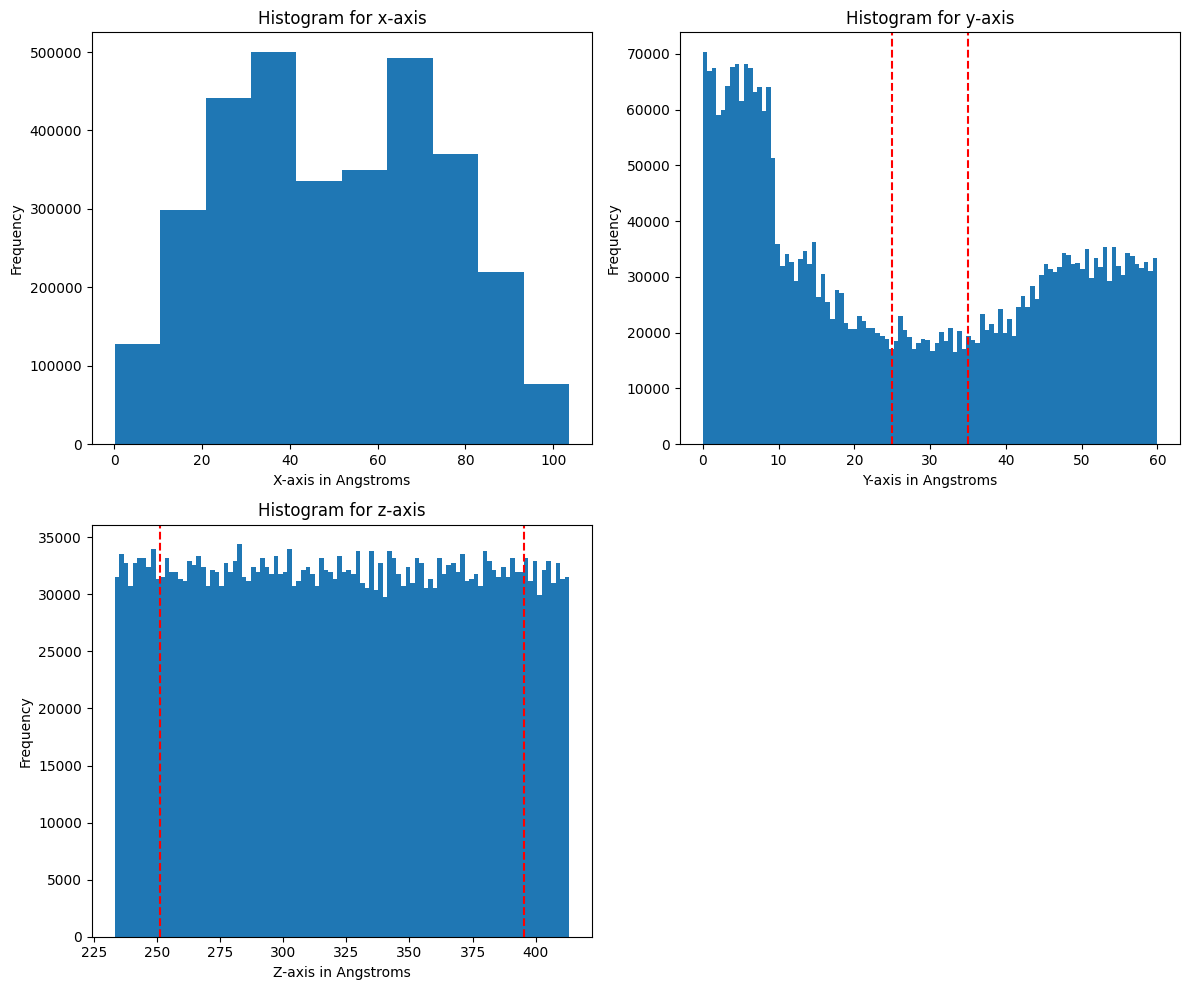

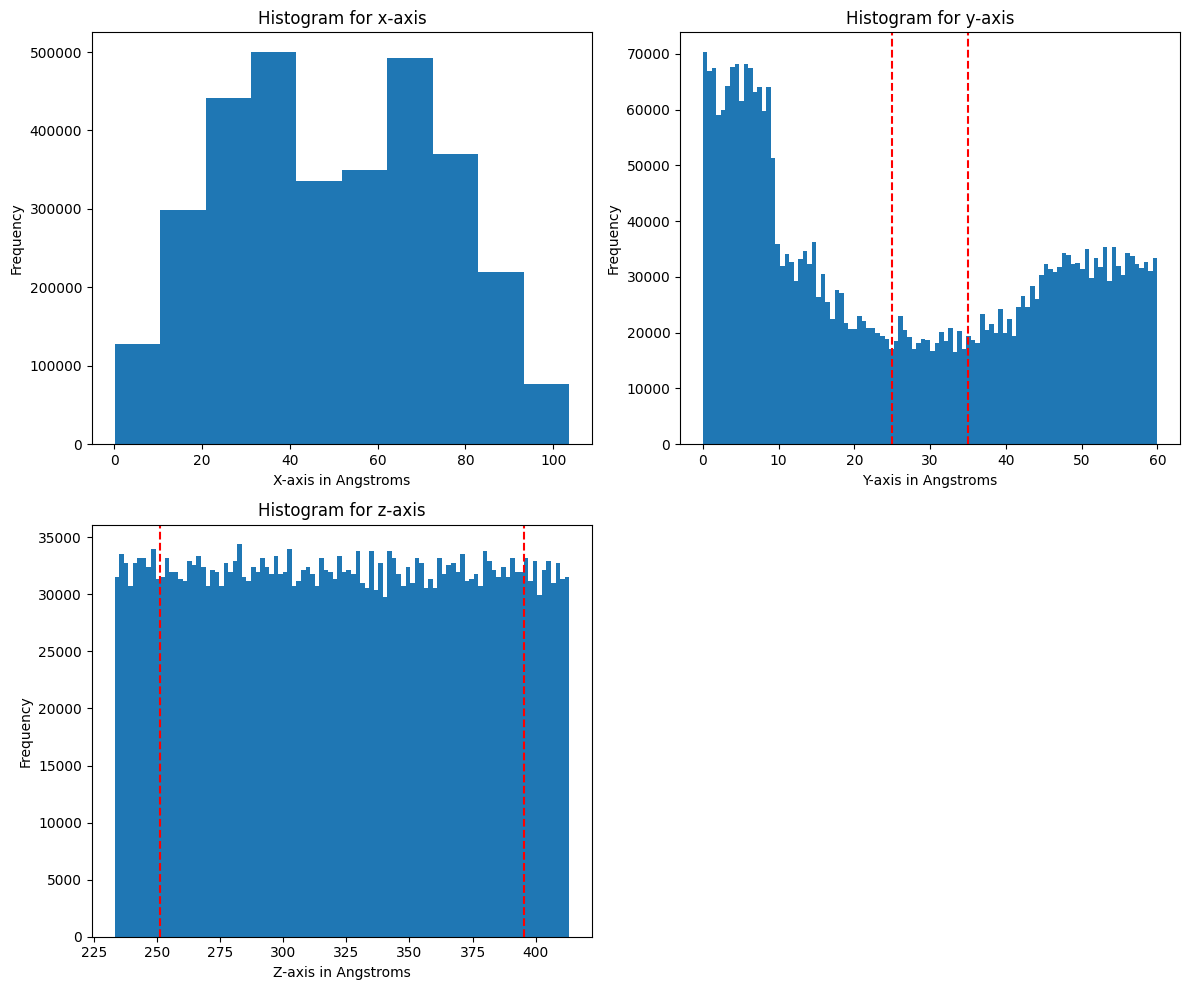

In [6]:
PA.analyseConstraints(
    "resname C",
    y_constraints=(25,35),
    z_constraints=PA.membrane.find_zConstraints(),
)

### 6.2 Calculate the effective pore diameter

Allocating trajectories for selectors: "resname HEX and name C1".
	Progress: 24%

	Progress: 100%
Trajectories allocated.
(37.58155496354784, 66.52886299248097)
The effective pore size is: 28.94730802893313


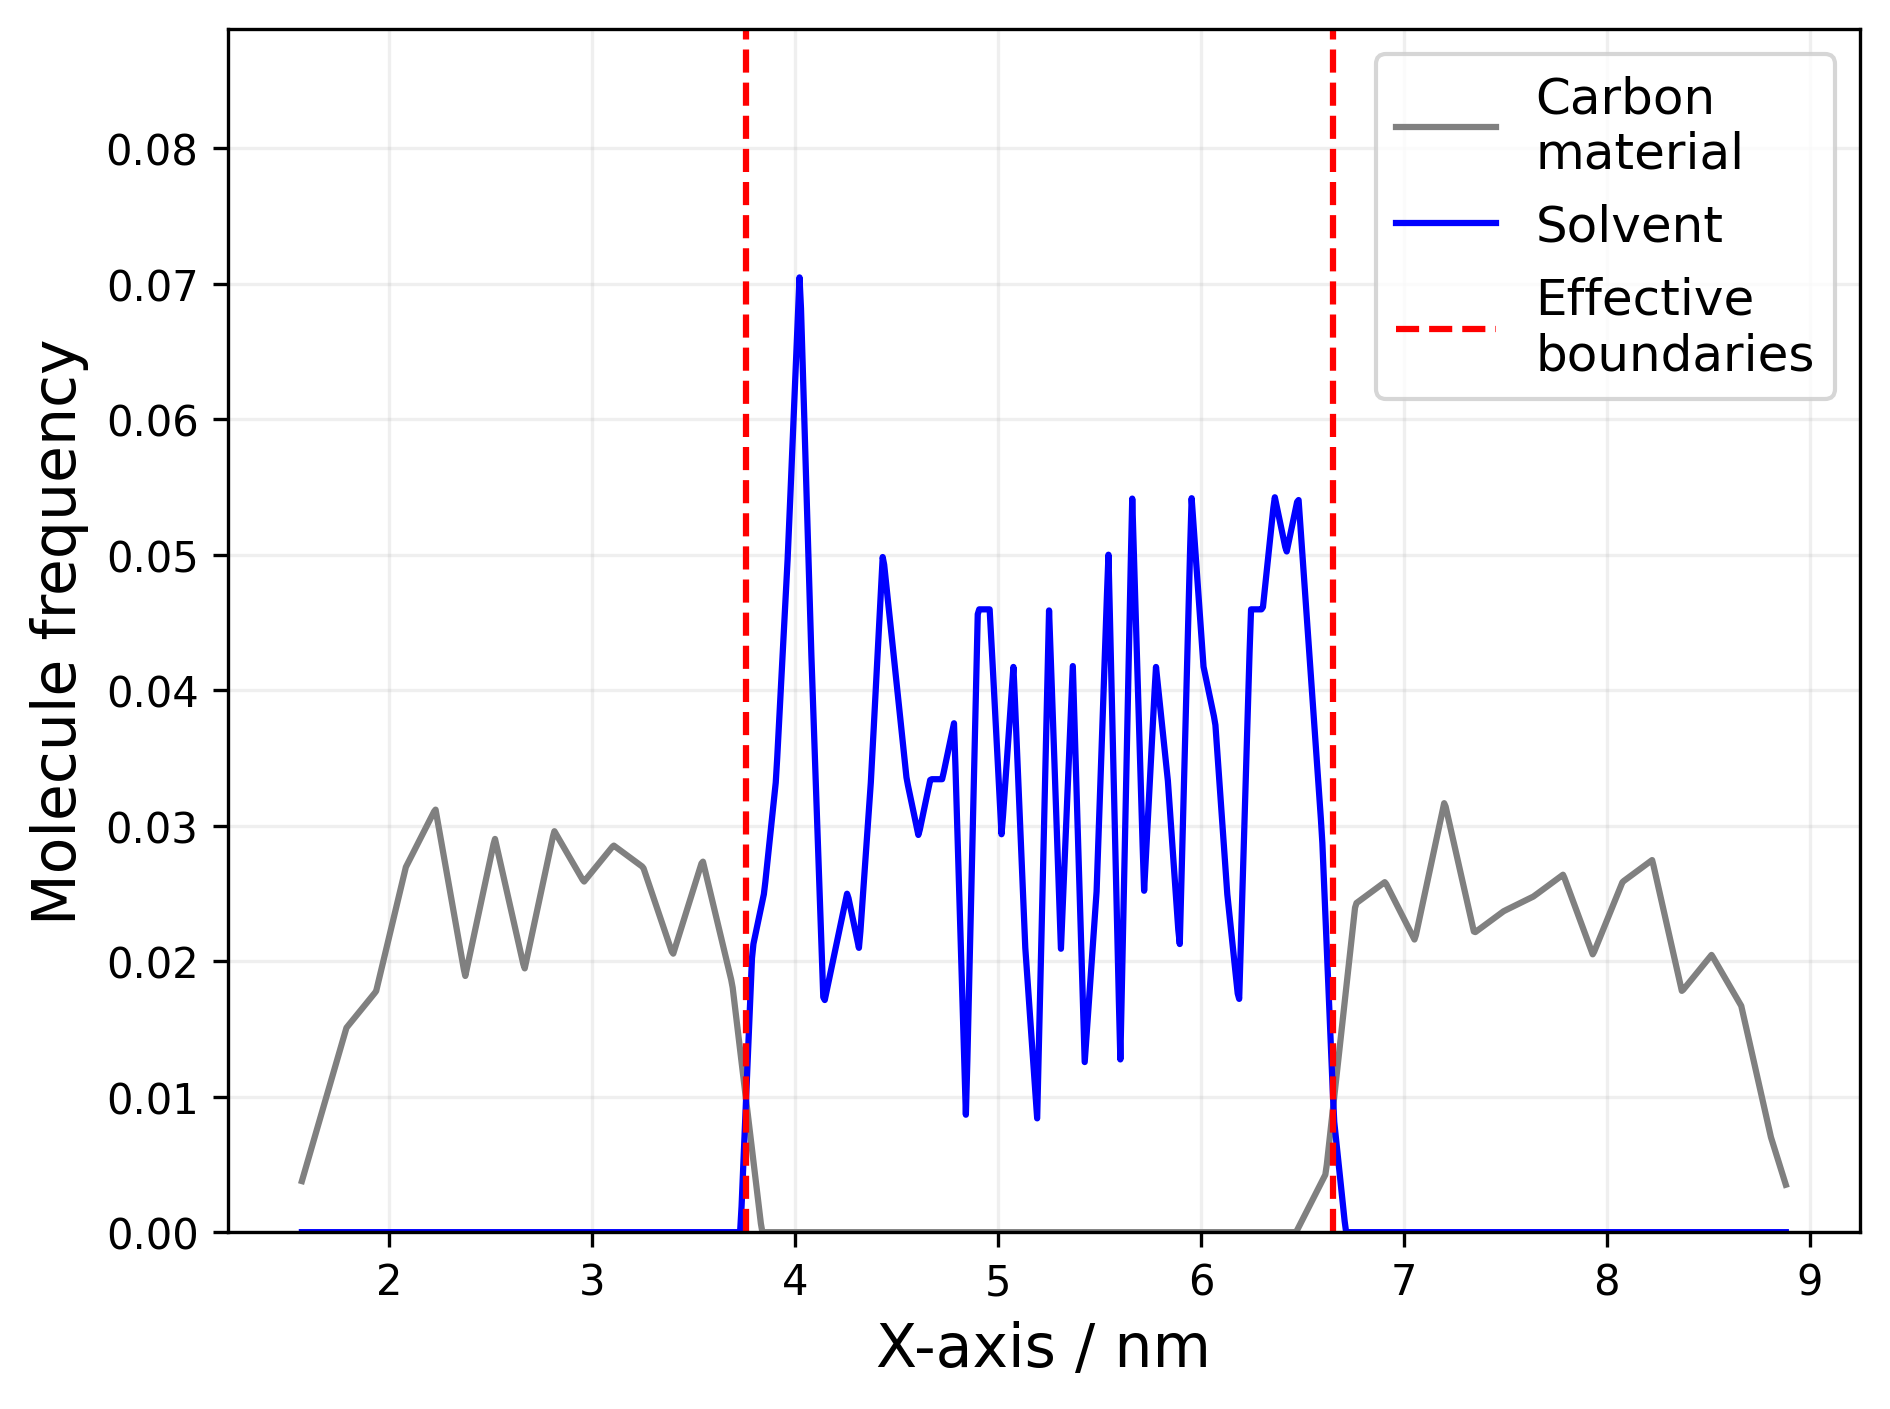

In [7]:
edges, _ = PA.calculateEffectivePoreSize(
    solvent_selectors=["resname HEX and name C1"],
    z_constraints=PA.membrane.find_zConstraints(),
    y_constraints=(25,35),
    strategy="intersection",
    bins=50,
)
print(edges)
print(f"The effective pore size is: {edges[1] - edges[0]}")